In [1]:
import numpy as np
import pandas as pd

from utils import get_range, get_metrics
from models import NaiveSharpe

In [2]:
# Past date range
past_start_date = "2023-01-31"
past_end_date = "2024-01-30"

# Future date range
future_start_date = "2024-01-31"
future_end_date = "2025-01-30"

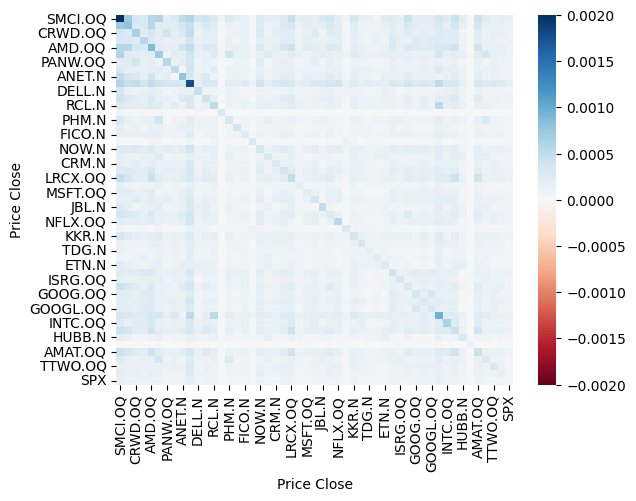

In [4]:
# Load in the full price dataframes
price_df = pd.read_pickle("spx_df_2025-04-08")
index_price_df = pd.read_pickle("spx_index_df_2025-04-08")

# Get prices for selected date ranges
past_price_df = get_range(past_start_date, past_end_date, price_df)
past_spx_df = get_range(past_start_date, past_end_date, index_price_df)

# Join stocks and index dataframes
past_price_df = pd.concat([past_price_df, past_spx_df], axis=1)

# Get metrics for past price history
daily_returns, daily_log_returns, \
annualised_returns, annualised_log_returns, \
top_n_stocks, covariance_matrix = get_metrics(past_price_df, n=50, show=True)

OPTIMIZED SHARPE RATIO:
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.4293977021704563
       x: [ 3.462e-02  4.001e-02 ...  9.718e-17  1.134e-16]
     nit: 17
     jac: [ 1.972e-03 -5.159e-04 ...  5.620e-01  6.304e-01]
    nfev: 884
    njev: 17
--------------------------------------------------------------------------------


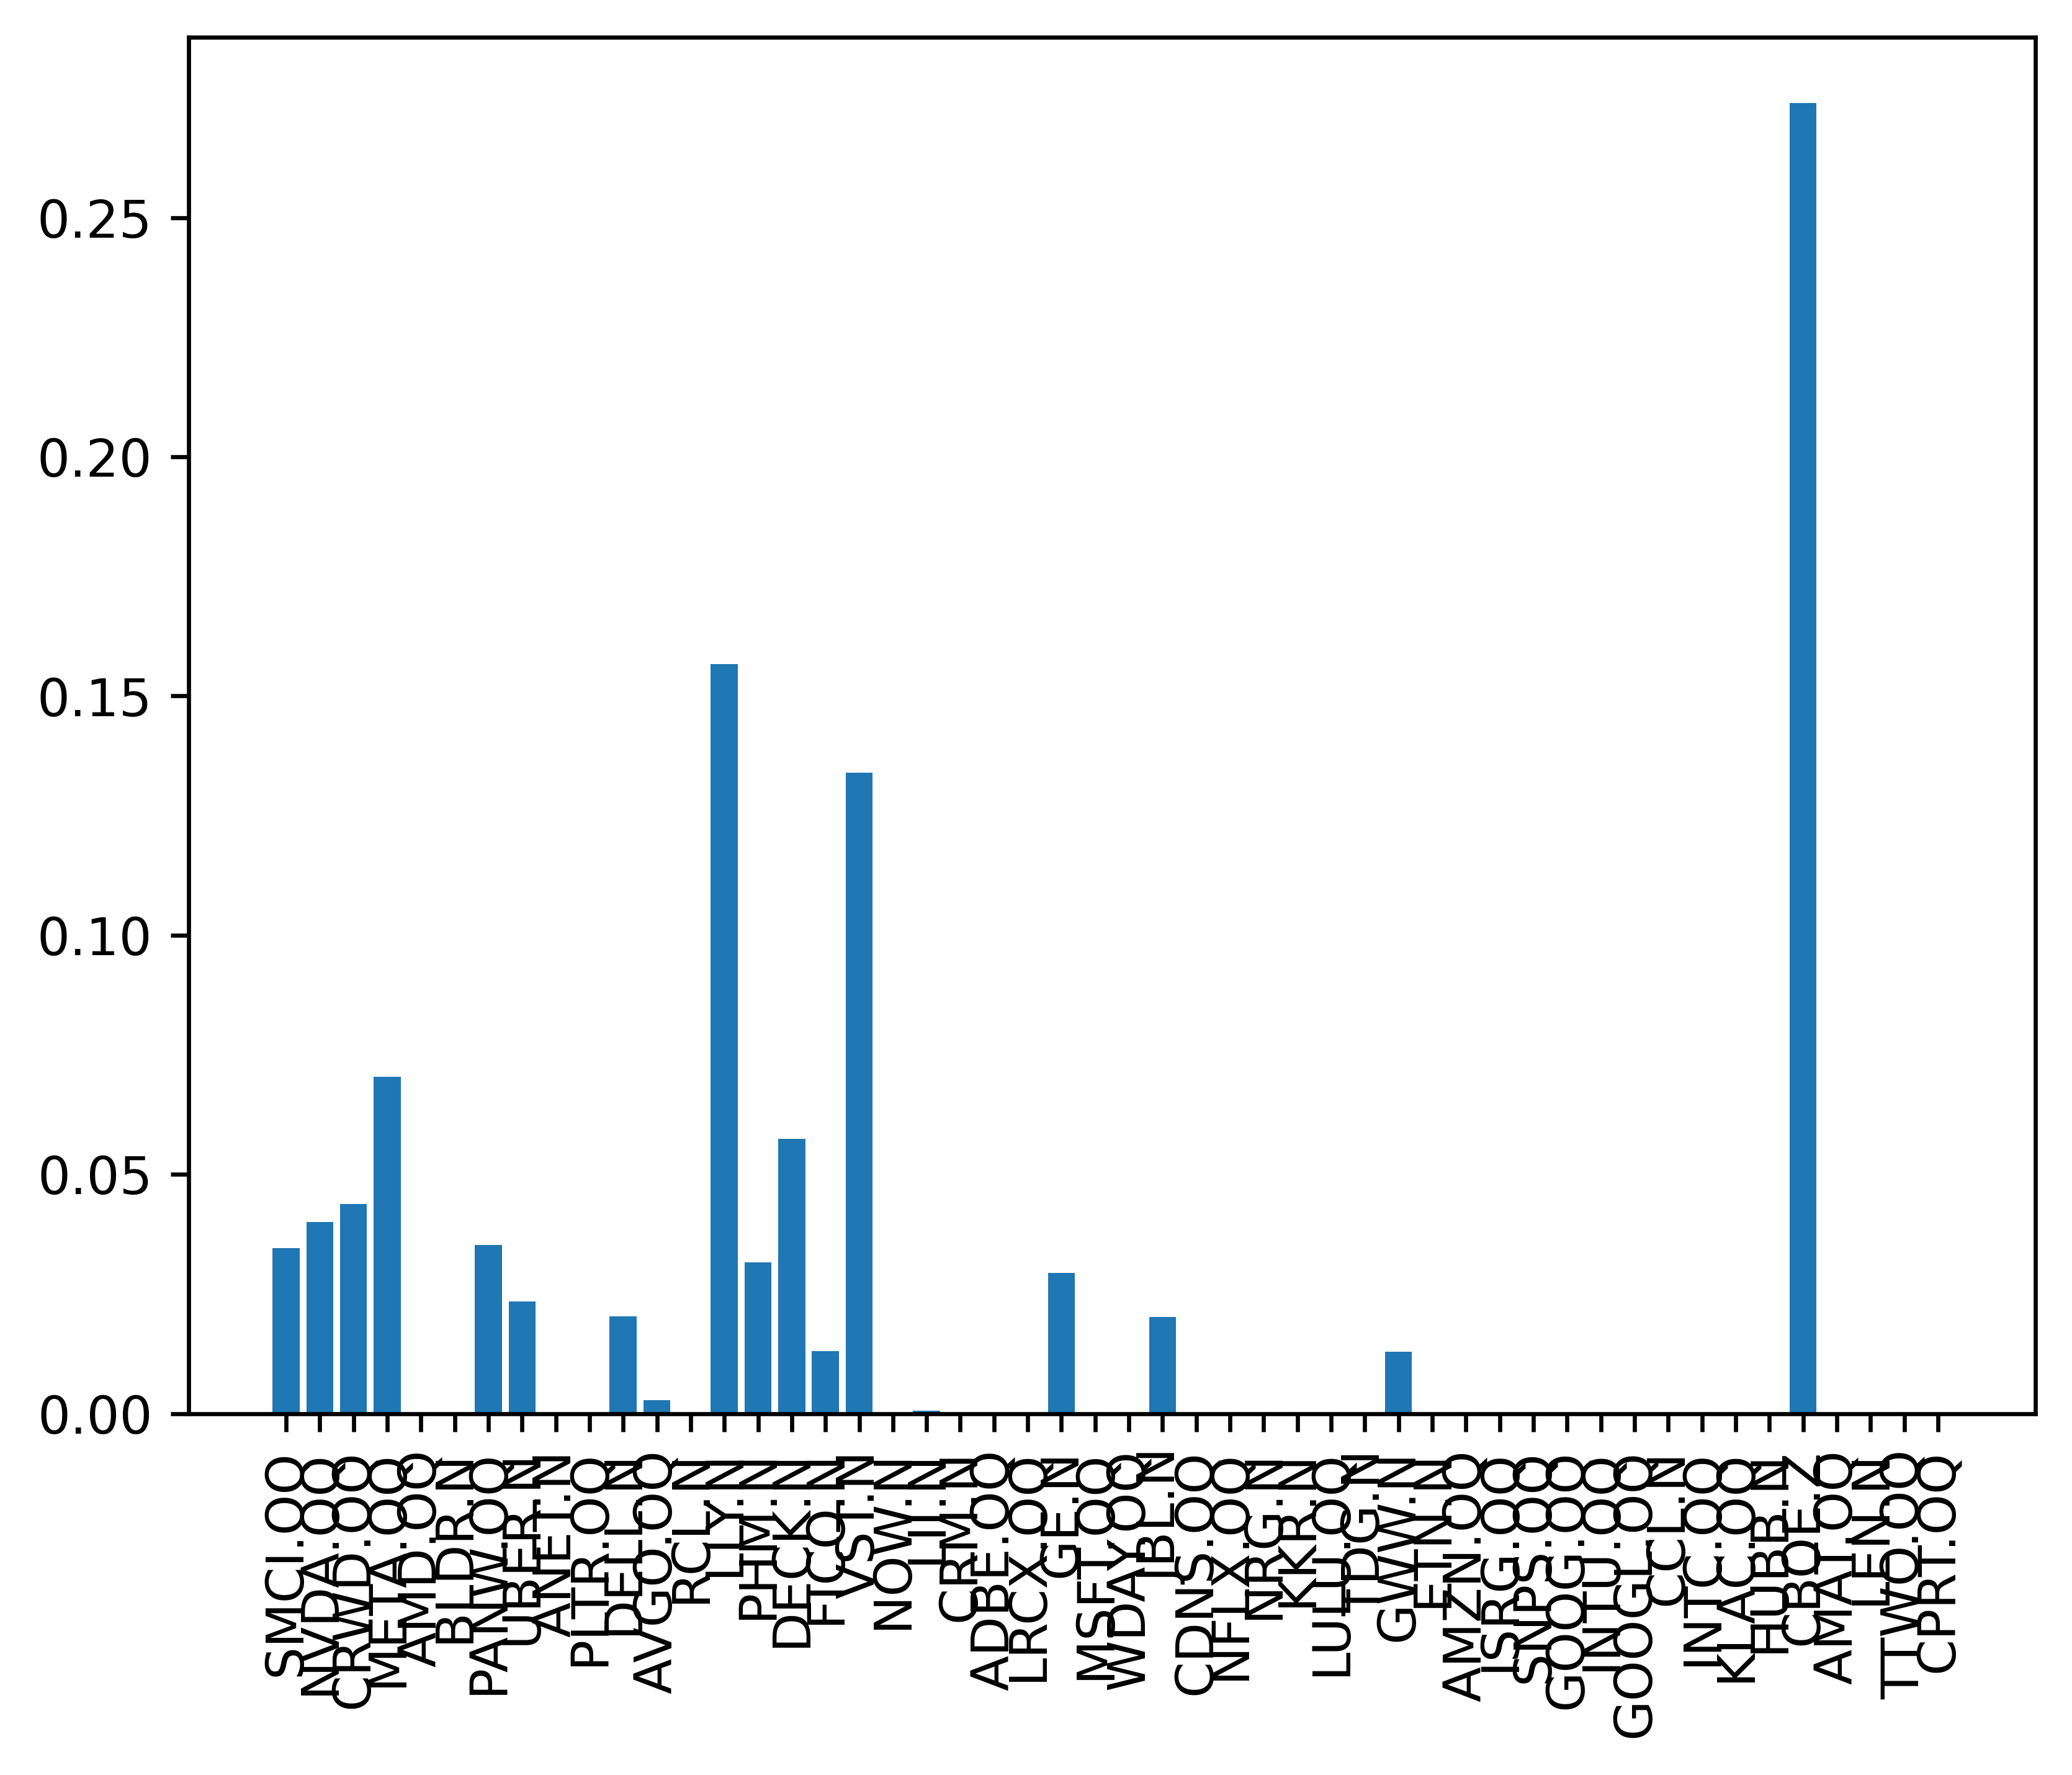

In [29]:
naive_model = NaiveSharpe(annualised_log_returns, top_n_stocks, covariance_matrix)
naive_model.optimise()

In [30]:
naive_model.hedge()

### Load future price data

In [11]:
# Get prices for selected date ranges
future_price_df = get_range(future_start_date, future_end_date, price_df)
future_spx_df = get_range(future_start_date, future_end_date, index_price_df)

# Join stocks and index dataframes
future_price_df = pd.concat([future_price_df, future_spx_df], axis=1)

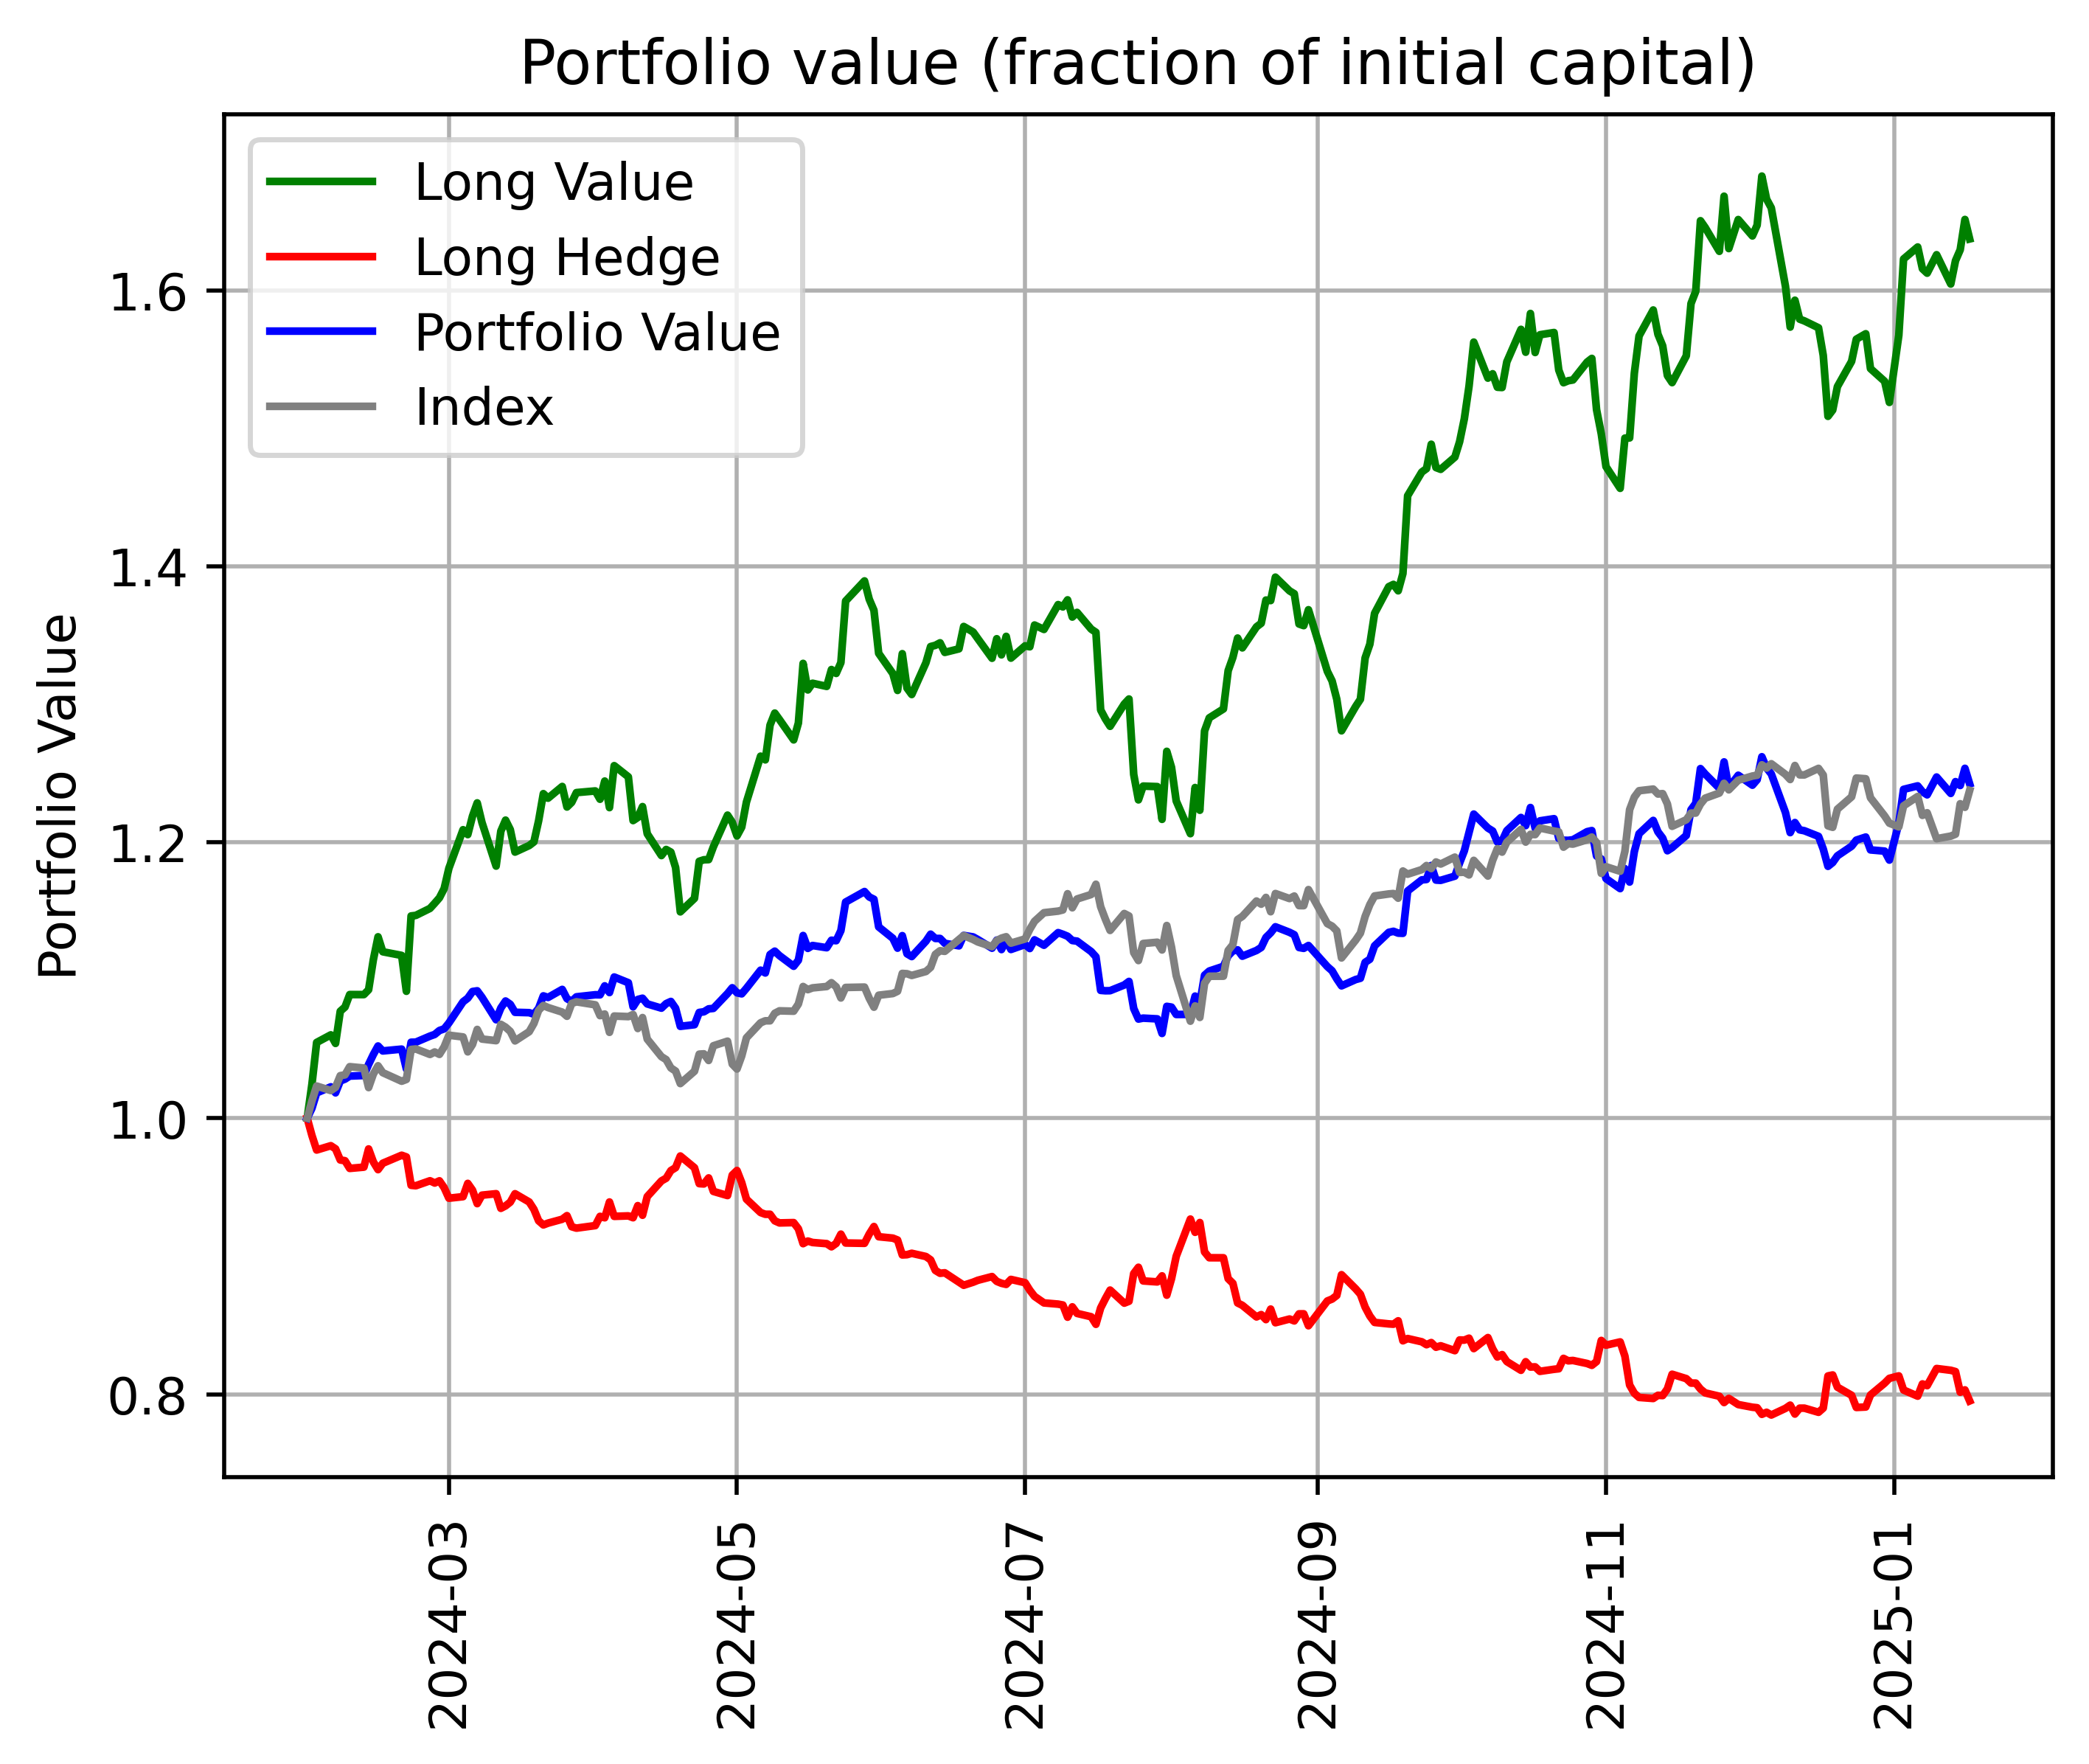

Index Sharpe:  1.8395763047166993
Portfolio Sharpe:  1.9545468089229907
Correlation:  0.38568383979897625


In [12]:
naive_model.backtest(future_price_df)